<a href="https://colab.research.google.com/github/Kaiziferr/Deep_Learning_Workshop/blob/master/multilayer_perceptron/01_workshop_evaluate_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.metrics import Recall

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Kaiziferr/Deep_Learning_Workshop/master/workshop_keras_sklearn_introduction/diabetes.csv')
data_values = data.values

# Data Split

In [3]:
X = data_values[:, 0:8]
y = data_values[:,8]

# Holdount

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = None, shuffle = True)

[Text(0, 0, 'health \n 0.65'), Text(0, 0, 'sick\n0.35')]

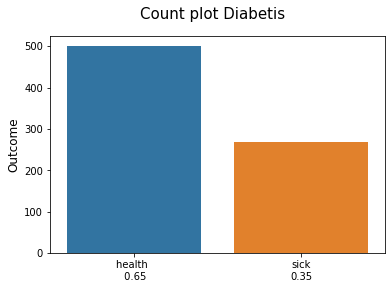

In [5]:
fig, ax = plt.subplots(figsize = (6,4))
fig.suptitle('Count plot Diabetis', fontsize = 15)
sns.countplot(x=data_values[:,8], ax = ax)
ax.set_ylabel('Outcome', size = 12)
_, data_target = np.unique(data_values[:,8], return_counts = True)
len_data = data_values.shape[0]
pe = '{0:.2f}'.format(data_target[1]/len_data)
ps = '{0:.2f}'.format(data_target[0]/len_data)
ax.set_xticklabels([f'health \n {ps}', f'sick\n{pe}'])

- Hay un desbalance

In [6]:
model = Sequential()
model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)

In [7]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])

In [8]:
# Problema de optimización
loss, accuracy, recall = model.evaluate(X_train, y_train)
print('Recall: %.3f' % recall)
print('Accuracy: %.3f' % accuracy)
print('Loss: %.3f'% loss)

17/17 [==============================] - 0s 2ms/step - loss: 0.5319 - accuracy: 0.7486 - recall: 0.8723
Recall: 0.872
Accuracy: 0.749
Loss: 0.532


In [9]:
# Problema de optimización
val_loss, val_accuracy, val_recall = model.evaluate(X_test, y_test)
print('Val Recall: %.3f' % recall)
print('Val Accuracy: %.3f' % accuracy)
print('val Loss: %.3f'% loss)

8/8 [==============================] - 0s 2ms/step - loss: 0.6873 - accuracy: 0.7056 - recall: 0.7625
Val Recall: 0.872
Val Accuracy: 0.749
val Loss: 0.532


In [10]:
#Keys
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'recall', 'val_loss', 'val_accuracy', 'val_recall'])


# Recall and Loss

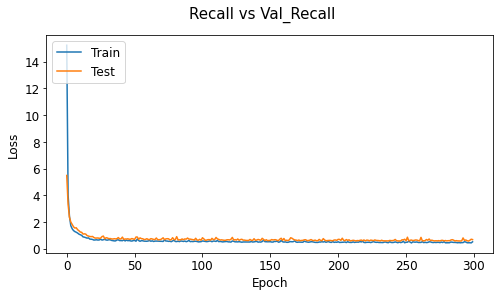

In [11]:
fig, ax = plt.subplots(figsize = (8,4))
fig.suptitle('Recall vs Val_Recall', fontsize = 15)
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.set_xlabel('Epoch', size = 12)
ax.set_ylabel('Loss', size = 12)
ax.legend(['Train', 'Test'], loc = 'upper left', fontsize = 12)
ax.tick_params(labelsize = 12)

- La perdida de entrenamiento y validación converge, no se presenta overfitting
- La perdada sigue siendo alta
- Requiero mas datos

# Predictions

In [12]:
y_pred = (model.predict(X_test)>0.5).astype('int32')
y_pred = np.reshape(y_pred, y_pred.shape[0])
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

In [13]:
for i in range(15):
  print('%s --> %d (real %d)'% (X_test[i].tolist(), y_pred[i], y_test[i]))

[3.0, 102.0, 74.0, 0.0, 0.0, 29.5, 0.121, 32.0] --> 0 (real 0)
[1.0, 79.0, 75.0, 30.0, 0.0, 32.0, 0.396, 22.0] --> 0 (real 0)
[8.0, 91.0, 82.0, 0.0, 0.0, 35.6, 0.5870000000000001, 68.0] --> 0 (real 0)
[1.0, 181.0, 64.0, 30.0, 180.0, 34.1, 0.32799999999999996, 38.0] --> 1 (real 1)
[2.0, 112.0, 86.0, 42.0, 160.0, 38.4, 0.24600000000000002, 28.0] --> 0 (real 0)
[1.0, 133.0, 102.0, 28.0, 140.0, 32.8, 0.23399999999999999, 45.0] --> 0 (real 1)
[6.0, 195.0, 70.0, 0.0, 0.0, 30.9, 0.32799999999999996, 31.0] --> 1 (real 1)
[0.0, 126.0, 84.0, 29.0, 215.0, 30.7, 0.52, 24.0] --> 0 (real 0)
[10.0, 101.0, 76.0, 48.0, 180.0, 32.9, 0.171, 63.0] --> 1 (real 0)
[4.0, 137.0, 84.0, 0.0, 0.0, 31.2, 0.252, 30.0] --> 1 (real 0)
[9.0, 91.0, 68.0, 0.0, 0.0, 24.2, 0.2, 58.0] --> 0 (real 0)
[2.0, 89.0, 90.0, 30.0, 0.0, 33.5, 0.292, 42.0] --> 0 (real 0)
[0.0, 131.0, 66.0, 40.0, 0.0, 34.3, 0.196, 22.0] --> 0 (real 1)
[10.0, 111.0, 70.0, 27.0, 0.0, 27.5, 0.141, 40.0] --> 1 (real 1)
[10.0, 115.0, 0.0, 0.0, 0.0, 0.0, 

# Sesgo predictivo

In [14]:
#sesgo predicción = promedio de predicciones - promedio de etiquetas (observaciones) en el conjunto de datos

# Sick
average_prediction = (len(y_pred[y_pred==1])/len(y_pred))
average_label_target = (len(y_test[y_test==1]) / len(y_test)) 
sesgo_prediction = average_prediction - average_label_target
sesgo_prediction

0.12987012987012986

# Confusion Matrix

In [15]:
matrix = metrics.confusion_matrix(y_test, y_pred)
matrix

array([[102,  49],
       [ 19,  61]])

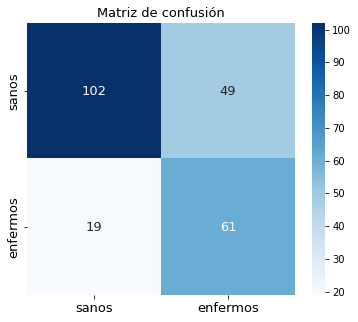

In [16]:
fig, ax = plt.subplots(nrows= 1, ncols=  1, figsize = (6,5))
sns.heatmap(matrix, annot=True, ax = ax, cmap=plt.cm.Blues, fmt = 'g', annot_kws={'size': 13})
ax.set_title('Matriz de confusión', size = 13)
ax.xaxis.set_ticklabels(['sanos', 'enfermos'])
ax.yaxis.set_ticklabels(['sanos', 'enfermos'])
ax.tick_params(labelsize = 13)

# Metrics

In [17]:
print(f'Accuracy  :   {metrics.accuracy_score(y_test, y_pred)}')
print(f'Kappa     :   {metrics.cohen_kappa_score(y_test, y_pred)}')

print(f'predicción enfermos')
print(f'Prediction:   {metrics.precision_score(y_test, y_pred, [1], average="macro")}')
print(f'Recall    :   {metrics.recall_score(y_test, y_pred, [1], average="macro")}')

VN = matrix[0,0]
FP = matrix[0,1]
specificity = VN/(VN+FP)

print(f'Specificity:   {specificity}')
print(f'F1-score   :   {metrics.f1_score(y_test, y_pred, [1], average="macro")}' )

Accuracy  :   0.7056277056277056
Kappa     :   0.402510460251046
predicción enfermos
Prediction:   0.5545454545454546
Recall    :   0.7625
Specificity:   0.6754966887417219
F1-score   :   0.6421052631578948


- El modelo es deficiente al momento de predecir los enfermos

# Cross Validation

In [18]:
kfold = StratifiedKFold(n_splits=10, shuffle=True)

cvscores_loss_train = []
cvscores_loss_test = []
cvscores_recall_train = []
cvscores_recall_test = []

for train, test in kfold.split(X,y):
  model = Sequential()
  model.add(Dense(12, input_dim = 8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(8, activation='relu', kernel_initializer='glorot_uniform'))
  model.add(Dense(1, activation='sigmoid', kernel_initializer='glorot_uniform'))
  model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy', Recall()])
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 300, batch_size = 16, verbose = 0)
  loss_train, _,recall_train = model.evaluate(X[train], y[train], verbose=0)
  cvscores_loss_train.append(loss_train)
  cvscores_recall_train.append(recall_train)
  loss_test, _, recall_test = model.evaluate(X[test], y[test], verbose=0)
  cvscores_loss_test.append(loss_test)
  cvscores_recall_test.append(recall_test)
  print('======================================================================')
  print('loss: %.3f recall: %.3f%% val_loss: %.3f val_recall: %.3f%%' % (loss_train, recall_train*100, loss_test, loss_test*100))

loss: 0.537 recall: 57.261% val_loss: 0.546 val_recall: 54.588%
loss: 0.452 recall: 60.996% val_loss: 0.589 val_recall: 58.889%
loss: 0.518 recall: 51.037% val_loss: 0.441 val_recall: 44.055%
loss: 0.525 recall: 64.730% val_loss: 0.467 val_recall: 46.671%
loss: 0.490 recall: 60.581% val_loss: 0.422 val_recall: 42.238%
loss: 0.516 recall: 55.602% val_loss: 0.508 val_recall: 50.844%
loss: 0.490 recall: 51.867% val_loss: 0.524 val_recall: 52.364%
loss: 0.493 recall: 64.315% val_loss: 0.522 val_recall: 52.184%
loss: 0.507 recall: 45.041% val_loss: 0.431 val_recall: 43.109%
loss: 0.490 recall: 59.917% val_loss: 0.400 val_recall: 40.028%


In [19]:
print('==============================Train Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_train), np.std(cvscores_recall_train)))
print('==============================Test Recall Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_recall_test), np.std(cvscores_recall_test)))
print('==============================Train Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_train), np.std(cvscores_loss_train)))
print('==============================Test Loss Total 10 pliegues==============================')
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores_loss_test), np.std(cvscores_loss_test)))

==============================Train Recall Total 10 pliegues==============================
0.57% (+/- 0.06%)
==============================Test Recall Total 10 pliegues==============================
0.55% (+/- 0.13%)
==============================Train Loss Total 10 pliegues==============================
0.50% (+/- 0.02%)
==============================Test Loss Total 10 pliegues==============================
0.48% (+/- 0.06%)


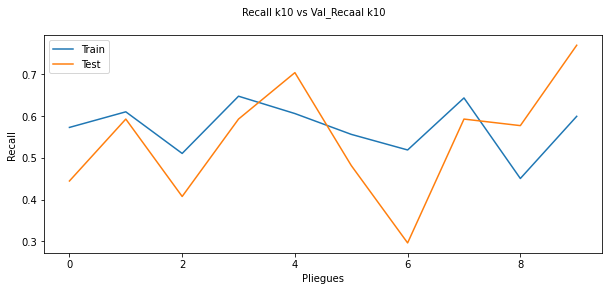

In [20]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Recall k{len(cvscores_recall_train)} vs Val_Recaal k{len(cvscores_recall_test)}', fontsize = 10)
ax.plot(cvscores_recall_train)
ax.plot(cvscores_recall_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Recall', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)

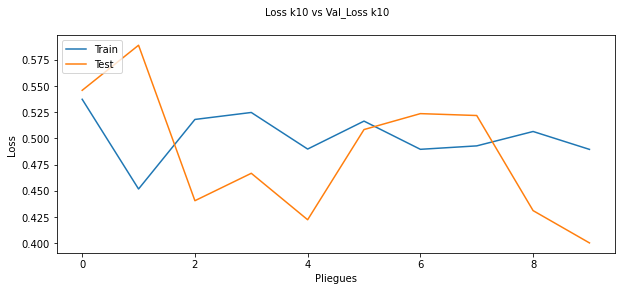

In [21]:
fig, ax = plt.subplots(figsize = (10,4))
fig.suptitle(f'Loss k{len(cvscores_loss_train)} vs Val_Loss k{len(cvscores_loss_test)}', fontsize = 10)
ax.plot(cvscores_loss_train)
ax.plot(cvscores_loss_test)
ax.set_xlabel('Pliegues', size = 10)
ax.set_ylabel('Loss', size = 10)
ax.legend(['Train', 'Test'], loc='upper left', fontsize = 10)
ax.tick_params(labelsize = 10)